In [1]:
import os
import os.path
import glob
import numpy as np
import Image,leargist
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn import svm

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
import sklearn_evaluation.plot as skplot
from sklearn.model_selection import learning_curve

import matplotlib.pyplot as plt
import matplotlib.cm as colormap
plt.rcParams['image.cmap'] = 'Paired'

import numpy as np
np.random.seed(1)

In [2]:
imagedir = "Datasets/malimg_paper_dataset_imgs"

In [3]:
cur_dir = os.getcwd()
os.chdir(imagedir)  # the parent folder with sub-folders

# Get number of samples per family
list_fams = sorted(os.listdir(os.getcwd()), key=str.lower)  # vector of strings with family names
no_imgs = []  # No. of samples per family
for i in range(len(list_fams)):
    os.chdir(list_fams[i])
    len1 = len(glob.glob('*.png'))  # assuming the images are stored as 'png'
    no_imgs.append(len1)
    os.chdir('..')
num_samples = np.sum(no_imgs)  # total number of all samples

# Compute the labels
y = np.zeros(num_samples)
pos = 0
label = 0
for i in no_imgs:
    print ("Label:%2d\tFamily: %15s\tNumber of images: %d" % (label, list_fams[label], i))
    for j in range(i):
        y[pos] = label
        pos += 1
    label += 1
num_classes = label

# Compute the features
X = np.zeros((num_samples, 320))
cnt = 0
list_paths = [] # List of image paths
print("Processing images ...")
for i in range(len(list_fams)):
    for img_file in glob.glob(list_fams[i]+'/*.png'):
        #print("[%d] Processing image: %s" % (cnt, img_file))
        im = Image.open(img_file)
        im1 = im.resize((64,64),Image.ANTIALIAS); # for faster computation
        des = leargist.color_gist(im1)
        X[cnt] = des[0:320]
        cnt += 1
print("Images processed: %d" %(cnt))

os.chdir(cur_dir)

Label: 0	Family:       Adialer.C	Number of images: 122
Label: 1	Family:       Agent.FYI	Number of images: 116
Label: 2	Family:       Allaple.A	Number of images: 2949
Label: 3	Family:       Allaple.L	Number of images: 1591
Label: 4	Family:   Alueron.gen!J	Number of images: 198
Label: 5	Family:       Autorun.K	Number of images: 106
Label: 6	Family:     C2LOP.gen!g	Number of images: 200
Label: 7	Family:         C2LOP.P	Number of images: 146
Label: 8	Family:  Dialplatform.B	Number of images: 177
Label: 9	Family:       Dontovo.A	Number of images: 162
Label:10	Family:        Fakerean	Number of images: 381
Label:11	Family:   Instantaccess	Number of images: 431
Label:12	Family:      Lolyda.AA1	Number of images: 213
Label:13	Family:      Lolyda.AA2	Number of images: 184
Label:14	Family:      Lolyda.AA3	Number of images: 123
Label:15	Family:       Lolyda.AT	Number of images: 159
Label:16	Family:     Malex.gen!J	Number of images: 136
Label:17	Family:   Obfuscator.AD	Number of images: 142
Label:18

In [4]:
X.shape

(9339, 320)

In [5]:
# Training top_model
C_range = np.logspace(-2, 10, 13)
param_grid = dict(C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=1)

top_model = GridSearchCV(svm.LinearSVC(), param_grid=param_grid, cv=cv, verbose=10, n_jobs=20)
top_model.fit(X,y)  # Training 

Fitting 5 folds for each of 13 candidates, totalling 65 fits
[CV] C=0.01 ..........................................................
[CV] C=0.01 ..........................................................
[CV] C=0.01 ..........................................................
[CV] C=0.01 ..........................................................
[CV] C=0.01 ..........................................................
[CV] C=0.1 ...........................................................
[CV] C=0.1 ...........................................................
[CV] C=0.1 ...........................................................
[CV] C=0.1 ...........................................................
[CV] C=0.1 ...........................................................
[CV] C=1.0 ...........................................................
[CV] C=1.0 ...........................................................
[CV] C=1.0 ...........................................................
[CV] C=1.0 .....

[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:    4.7s


[CV] C=100.0 .........................................................
[CV] ........................... C=0.01, score=0.624732, total=   4.8s
[CV] C=100.0 .........................................................
[CV] ........................... C=0.01, score=0.624197, total=   5.3s
[CV] C=1000.0 ........................................................
[CV] ............................ C=0.1, score=0.895075, total=   5.2s
[CV] ............................ C=0.1, score=0.894540, total=   5.1s
[CV] C=1000.0 ........................................................
[CV] C=1000.0 ........................................................
[CV] ............................ C=0.1, score=0.906852, total=   5.6s
[CV] C=1000.0 ........................................................
[CV] ............................ C=0.1, score=0.895610, total=   5.6s
[CV] C=1000.0 ........................................................


[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    6.3s


[CV] ............................ C=1.0, score=0.955032, total=  11.7s
[CV] C=10000.0 .......................................................
[CV] ............................ C=1.0, score=0.948073, total=  12.7s
[CV] C=10000.0 .......................................................
[CV] ............................ C=1.0, score=0.959850, total=  12.9s
[CV] ............................ C=1.0, score=0.950749, total=  12.8s
[CV] C=10000.0 .......................................................
[CV] C=10000.0 .......................................................
[CV] ............................ C=1.0, score=0.950749, total=  13.2s
[CV] C=10000.0 .......................................................
[CV] ........................... C=10.0, score=0.953426, total=  35.3s
[CV] C=100000.0 ......................................................
[CV] ........................... C=10.0, score=0.960385, total=  38.7s
[CV] C=100000.0 ......................................................
[CV] .

[Parallel(n_jobs=20)]: Done  21 tasks      | elapsed:   44.1s


[CV] ......................... C=1000.0, score=0.967880, total=  40.0s
[CV] C=1000000.0 .....................................................
[CV] .......................... C=100.0, score=0.960921, total=  41.1s
[CV] C=1000000.0 .....................................................
[CV] ........................... C=10.0, score=0.957173, total=  46.2s
[CV] C=1000000.0 .....................................................
[CV] .......................... C=100.0, score=0.965739, total=  43.1s
[CV] C=1000000.0 .....................................................
[CV] ........................... C=10.0, score=0.956103, total=  49.5s
[CV] C=10000000.0 ....................................................
[CV] ......................... C=1000.0, score=0.973769, total=  49.9s
[CV] C=10000000.0 ....................................................
[CV] ......................... C=1000.0, score=0.966274, total=  51.1s
[CV] C=10000000.0 ....................................................
[CV] .

[Parallel(n_jobs=20)]: Done  33 out of  65 | elapsed:  1.0min remaining:  1.0min


[CV] ........................ C=10000.0, score=0.968951, total=  49.0s
[CV] C=100000000.0 ...................................................
[CV] ........................ C=10000.0, score=0.966809, total=  51.4s
[CV] C=100000000.0 ...................................................
[CV] ....................... C=100000.0, score=0.968951, total=  41.8s
[CV] C=1000000000.0 ..................................................
[CV] ....................... C=100000.0, score=0.966809, total=  39.8s
[CV] C=1000000000.0 ..................................................
[CV] ....................... C=100000.0, score=0.967345, total=  39.8s
[CV] C=1000000000.0 ..................................................
[CV] ....................... C=100000.0, score=0.964133, total=  40.2s
[CV] C=1000000000.0 ..................................................
[CV] ...................... C=1000000.0, score=0.975375, total=  39.8s
[CV] C=1000000000.0 ..................................................


[Parallel(n_jobs=20)]: Done  40 out of  65 | elapsed:  1.4min remaining:   52.5s


[CV] ....................... C=100000.0, score=0.963062, total=  42.6s
[CV] C=10000000000.0 .................................................
[CV] ...................... C=1000000.0, score=0.970021, total=  42.1s
[CV] C=10000000000.0 .................................................
[CV] ...................... C=1000000.0, score=0.970557, total=  40.6s
[CV] C=10000000000.0 .................................................
[CV] ...................... C=1000000.0, score=0.959315, total=  42.8s
[CV] C=10000000000.0 .................................................
[CV] ...................... C=1000000.0, score=0.964668, total=  47.9s
[CV] C=10000000000.0 .................................................
[CV] ..................... C=10000000.0, score=0.970557, total=  47.3s
[CV] ..................... C=10000000.0, score=0.972163, total=  45.5s


[Parallel(n_jobs=20)]: Done  47 out of  65 | elapsed:  1.7min remaining:   38.7s


[CV] ..................... C=10000000.0, score=0.968951, total=  45.1s
[CV] ..................... C=10000000.0, score=0.965203, total=  46.5s
[CV] ..................... C=10000000.0, score=0.972698, total=  47.5s
[CV] .................... C=100000000.0, score=0.970557, total=  45.1s
[CV] .................... C=100000000.0, score=0.964133, total=  45.0s
[CV] .................... C=100000000.0, score=0.973769, total=  46.6s
[CV] .................... C=100000000.0, score=0.970557, total=  46.7s


[Parallel(n_jobs=20)]: Done  54 out of  65 | elapsed:  1.8min remaining:   22.1s


[CV] .................... C=100000000.0, score=0.968951, total=  43.8s
[CV] .................. C=10000000000.0, score=0.970557, total=  23.3s
[CV] ................... C=1000000000.0, score=0.974304, total=  37.5s
[CV] ................... C=1000000000.0, score=0.970557, total=  39.6s
[CV] ................... C=1000000000.0, score=0.966809, total=  37.5s
[CV] ................... C=1000000000.0, score=0.972698, total=  41.1s
[CV] .................. C=10000000000.0, score=0.974839, total=  35.0s


[Parallel(n_jobs=20)]: Done  61 out of  65 | elapsed:  2.0min remaining:    7.9s


[CV] ................... C=1000000000.0, score=0.965203, total=  36.1s
[CV] .................. C=10000000000.0, score=0.966274, total=  33.1s
[CV] .................. C=10000000000.0, score=0.965739, total=  33.8s
[CV] .................. C=10000000000.0, score=0.971092, total=  34.5s


[Parallel(n_jobs=20)]: Done  65 out of  65 | elapsed:  2.1min finished


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=1, test_size=0.2,
            train_size=None),
       error_score='raise',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params={}, iid=True, n_jobs=20,
       param_grid={'C': array([  1.00000e-02,   1.00000e-01,   1.00000e+00,   1.00000e+01,
         1.00000e+02,   1.00000e+03,   1.00000e+04,   1.00000e+05,
         1.00000e+06,   1.00000e+07,   1.00000e+08,   1.00000e+09,
         1.00000e+10])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=10)

In [6]:
print("Best parameters: %s - score: %0.4f" % (top_model.best_params_, top_model.best_score_))

Best parameters: {'C': 10000000.0} - score: 0.9699


In [7]:
top_model.cv_results_

{'mean_fit_time': array([  4.66402559,   5.14145403,  12.62725444,  42.00725894,
         39.45208035,  49.27824178,  48.96529059,  40.8268362 ,
         42.6147058 ,  46.38610115,  45.4428298 ,  38.33144879,  31.92907424]),
 'mean_score_time': array([ 0.0166636 ,  0.01745071,  0.01659298,  0.01816378,  0.01113701,
         0.01199355,  0.01087503,  0.01214323,  0.01267681,  0.01197381,
         0.00637183,  0.00614696,  0.0042532 ]),
 'mean_test_score': array([ 0.62591006,  0.89828694,  0.95289079,  0.95845824,  0.9630621 ,
         0.96970021,  0.96927195,  0.96605996,  0.96798715,  0.96991435,
         0.96959315,  0.96991435,  0.96970021]),
 'mean_train_score': array([ 0.62484273,  0.89722929,  0.95711417,  0.97269442,  0.98425914,
         0.99502075,  0.99140677,  0.99009503,  0.9918351 ,  0.99502075,
         0.9954223 ,  0.99574354,  0.99520814]),
 'param_C': masked_array(data = [0.01 0.10000000000000001 1.0 10.0 100.0 1000.0 10000.0 100000.0 1000000.0
  10000000.0 100000000.0 

In [8]:
top_model.grid_scores_

/usr/local/lib/python2.7/dist-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.62591, std: 0.00359, params: {'C': 0.01},
 mean: 0.89829, std: 0.00461, params: {'C': 0.10000000000000001},
 mean: 0.95289, std: 0.00413, params: {'C': 1.0},
 mean: 0.95846, std: 0.00404, params: {'C': 10.0},
 mean: 0.96306, std: 0.00360, params: {'C': 100.0},
 mean: 0.96970, std: 0.00384, params: {'C': 1000.0},
 mean: 0.96927, std: 0.00184, params: {'C': 10000.0},
 mean: 0.96606, std: 0.00216, params: {'C': 100000.0},
 mean: 0.96799, std: 0.00551, params: {'C': 1000000.0},
 mean: 0.96991, std: 0.00270, params: {'C': 10000000.0},
 mean: 0.96959, std: 0.00315, params: {'C': 100000000.0},
 mean: 0.96991, std: 0.00344, params: {'C': 1000000000.0},
 mean: 0.96970, std: 0.00336, params: {'C': 10000000000.0}]

In [9]:
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=1)
svm_model = svm.LinearSVC(C=top_model.best_params_['C'])
train_sizes = np.linspace(.1, 1.0, 10)
train_sizes, train_scores, test_scores = learning_curve(svm_model, X, y, cv=cv, n_jobs=20, train_sizes=train_sizes)

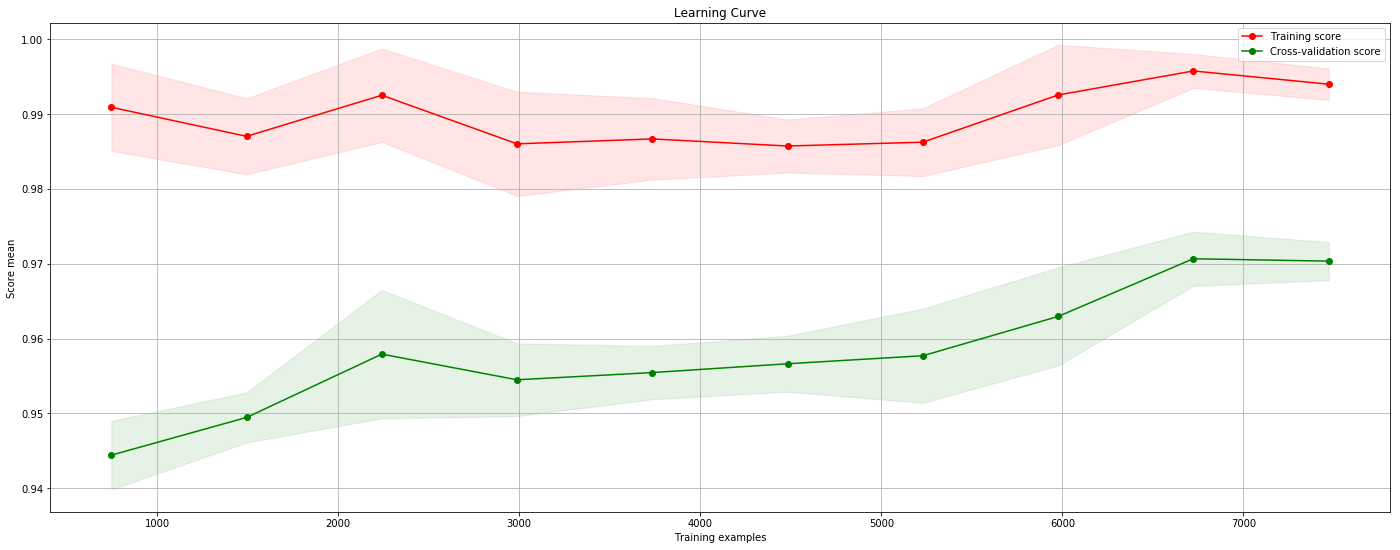

In [10]:
figure = plt.gcf()
figure.set_size_inches(24, 9)
skplot.learning_curve(train_scores, test_scores, train_sizes)
plt.show()